## **IMPORT ALL THE REQUIRED LIBRARIES**

---
*   **Pandas** to import data into a data frame and manipulate the data.
*   **Seaborn** and **matplotlib** to visualise the data and perform analysis.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **IMPORT DATA**

---

Import the csv data provided into pandas dataframe and check first 10 rows.

In [2]:
cwk_data = pd.read_csv('cwk_data_lixch37.csv')

cwk_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,50,services,married,primary,no,-15,no,yes,unknown,2,71,1,-1,0,unknown,no
1,33,blue-collar,married,primary,no,41,yes,no,cellular,13,173,1,-1,0,unknown,no
2,32,management,single,tertiary,no,1493,yes,no,unknown,28,65,11,-1,0,unknown,no
3,47,management,single,tertiary,no,86,no,no,cellular,5,253,1,97,4,success,yes
4,37,services,divorced,secondary,no,398,yes,yes,unknown,5,214,2,-1,0,unknown,no
5,30,technician,divorced,secondary,no,0,no,no,cellular,21,101,1,-1,0,unknown,no
6,52,management,married,tertiary,no,1111,no,no,unknown,5,17,1,-1,0,unknown,no
7,34,blue-collar,married,secondary,no,205,yes,yes,cellular,7,309,1,-1,0,unknown,no
8,34,technician,divorced,secondary,no,136,yes,no,cellular,8,136,2,-1,0,unknown,no
9,34,self-employed,married,primary,no,7468,yes,yes,cellular,30,383,1,-1,0,unknown,yes


## **DESCRIBING THE DATA**

---

By using describe function we can see how the data is distributed and how each input feature is is related to the output feature.


*   On top level, it can be observed that there are 4000 rows and we have a lot of rows for output feature 'no'.
*   There are 8 categorical features which have to be encoded to do further analysis.
*   There are 7 numerical features with mean information as shown below. These have to be scaled accordingly if the data has to be used in regression classifiers like the logistic regression.


In [3]:
cwk_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
count,4000.000000,4000,4000,4000,4000,4000.000000,4000,4000,4000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000,4000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,878,2302,1983,3930,NaN,2094,3385,2689,NaN,NaN,NaN,NaN,NaN,3217,3151
mean,40.781500,NaN,NaN,NaN,NaN,1281.211500,NaN,NaN,NaN,15.863750,289.088250,2.68850,42.868750,0.607000,NaN,NaN
std,10.906099,NaN,NaN,NaN,NaN,2523.774475,NaN,NaN,NaN,8.354677,292.094953,2.94162,102.870424,1.885322,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-1664.000000,NaN,NaN,NaN,1.000000,4.000000,1.00000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,82.000000,NaN,NaN,NaN,8.000000,107.000000,1.00000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,424.000000,NaN,NaN,NaN,16.000000,199.000000,2.00000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1400.500000,NaN,NaN,NaN,22.000000,360.250000,3.00000,-1.000000,0.000000,NaN,NaN


## **PLOTTING**

---

Now we will plot some charts to visualize the features and analyze how these input features are related to the output and each other. And we will try to understand if there are features which evidently predict the ouput well. 

First let us encode categories to see pairplot between each feature.

In [4]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder

encoded_data = cwk_data.copy()
ord_enc = OrdinalEncoder(dtype=int)
encoded_data[["job","marital","education","default","housing","loan","contact","poutcome"]] = ord_enc.fit_transform(cwk_data[["job","marital","education","default","housing","loan","contact","poutcome"]])
encoded_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,50,7,1,0,0,-15,0,1,2,2,71,1,-1,0,3,no
1,33,1,1,0,0,41,1,0,0,13,173,1,-1,0,3,no
2,32,4,2,2,0,1493,1,0,2,28,65,11,-1,0,3,no
3,47,4,2,2,0,86,0,0,0,5,253,1,97,4,2,yes
4,37,7,0,1,0,398,1,1,2,5,214,2,-1,0,3,no
5,30,9,0,1,0,0,0,0,0,21,101,1,-1,0,3,no
6,52,4,1,2,0,1111,0,0,2,5,17,1,-1,0,3,no
7,34,1,1,1,0,205,1,1,0,7,309,1,-1,0,3,no
8,34,9,0,1,0,136,1,0,0,8,136,2,-1,0,3,no
9,34,6,1,0,0,7468,1,1,0,30,383,1,-1,0,3,yes


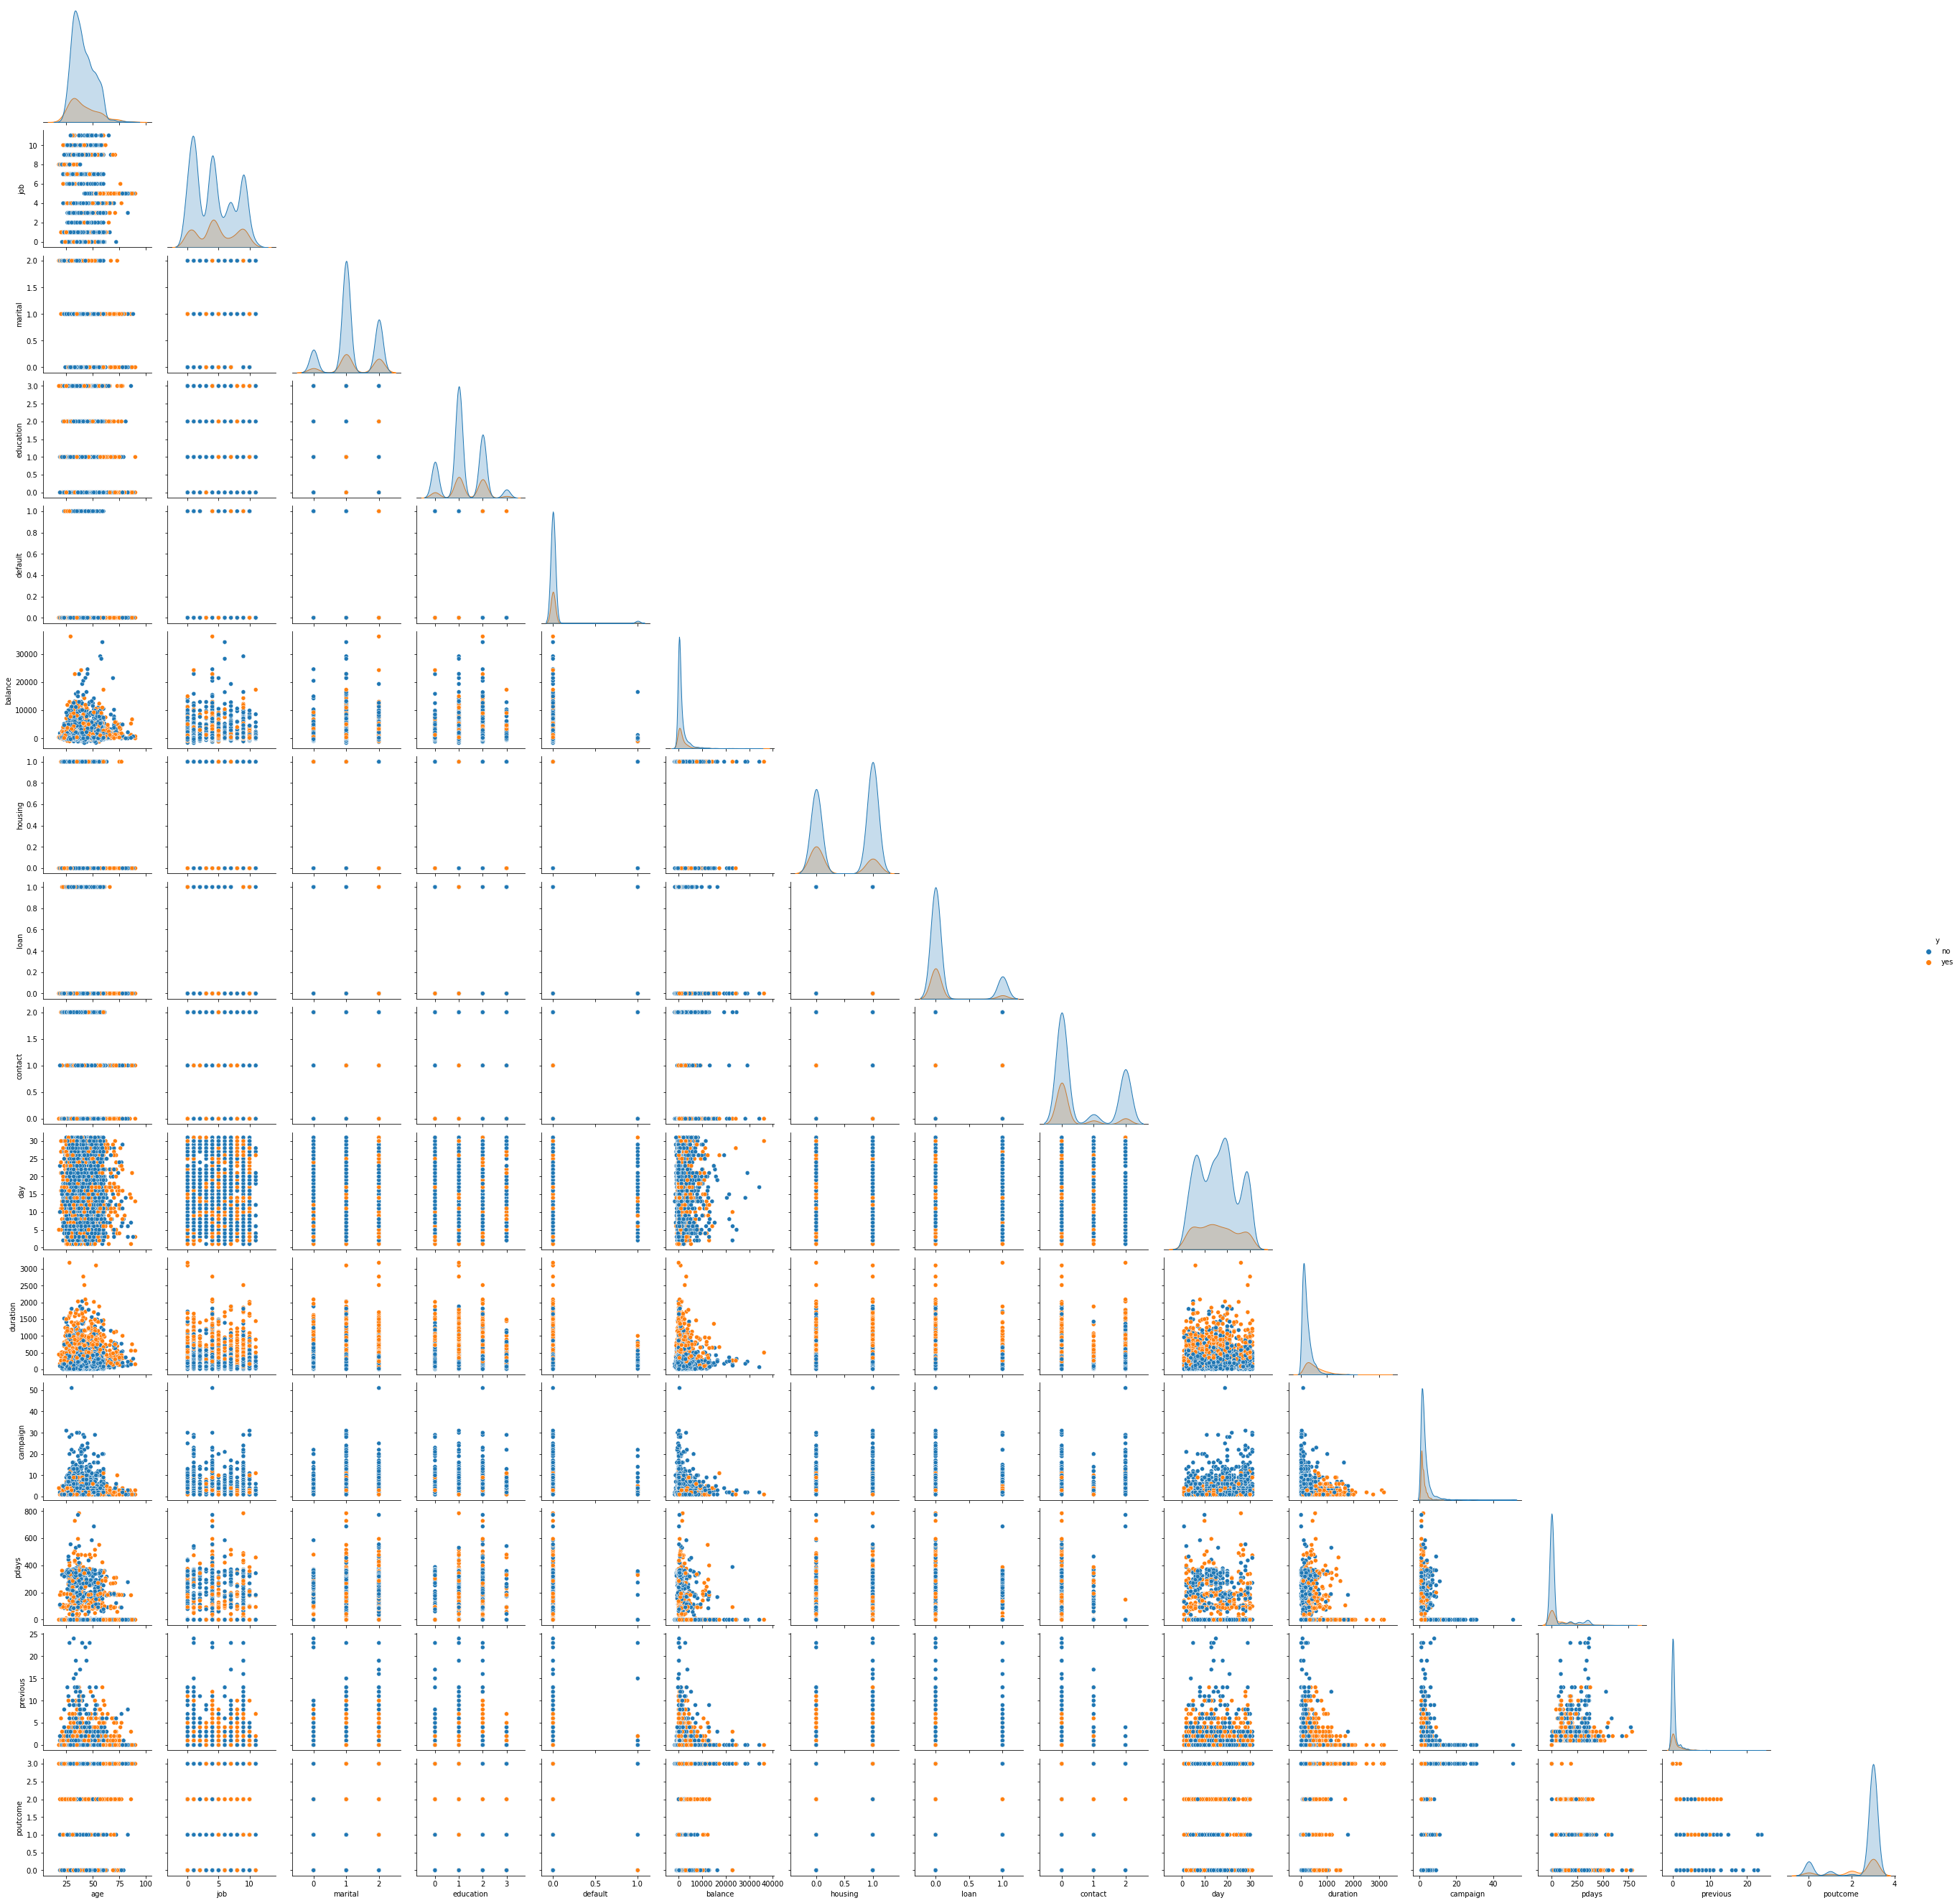

In [5]:
#Pair plotting
sns.pairplot(encoded_data,hue='y',corner=True)

From pair plots we can see that duration is an important feature. A box plot as shown below will also show the same difference. Although we will not be using this feature to train our model since duration information will not be available before contacting the person.

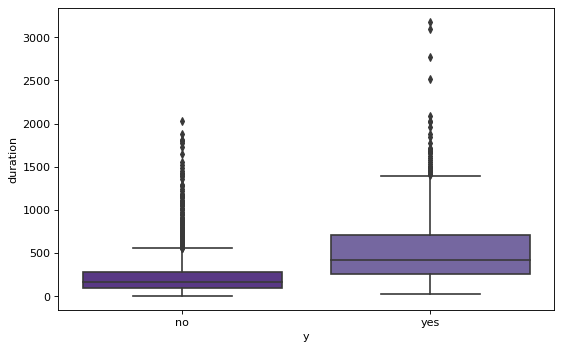

In [6]:
plt.figure(figsize=(8,5),dpi=80)
sns.set_palette('Purples_r')
sns.boxplot(x=encoded_data.y,y=encoded_data.duration, )

Other features like pdays, housing, age and job also provide some classification thresholds.
For example, a box plot of pdays will show it can used to classify.

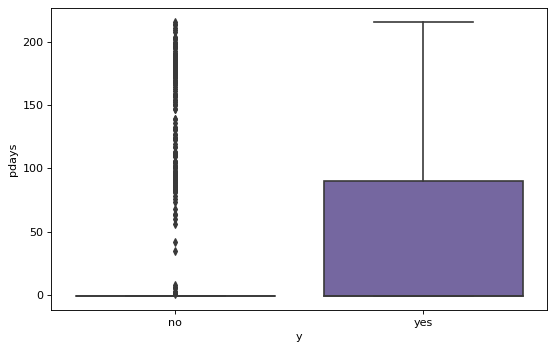

In [7]:
plt.figure(figsize=(8,5),dpi=80)
pdays_without_outliers = cwk_data[cwk_data.pdays < 220]
sns.boxplot(x=pdays_without_outliers.y,y=pdays_without_outliers.pdays)

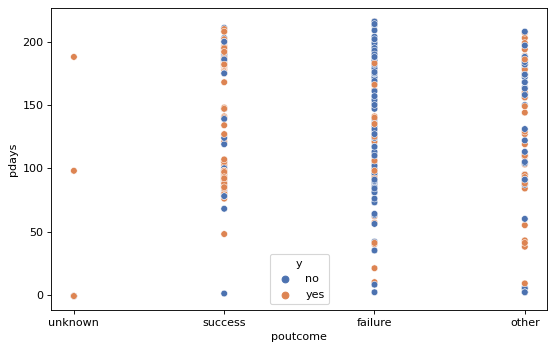

In [8]:
sns.set_palette('deep')
plt.figure(figsize=(8,5),dpi=80)
pdays_without_outliers = cwk_data[cwk_data.pdays < 220]
sns.scatterplot(x=pdays_without_outliers.poutcome,y=pdays_without_outliers.pdays, hue=pdays_without_outliers.y)

Housing also provides some info as in, if the person as a housing loan, the chances of choosing to invest in a fixed term is low. The number of people who say no is higher when they have a housing loan.

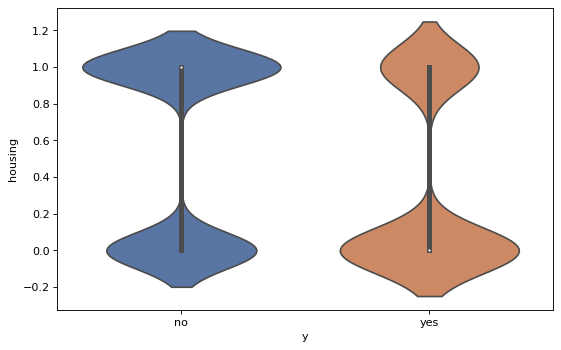

In [9]:
plt.figure(figsize=(8,5),dpi=80)
sns.violinplot(x=encoded_data.y,y=encoded_data.housing)

Age and job also provides some info, students and the retired are more interested in choosing to invest in such deposits.

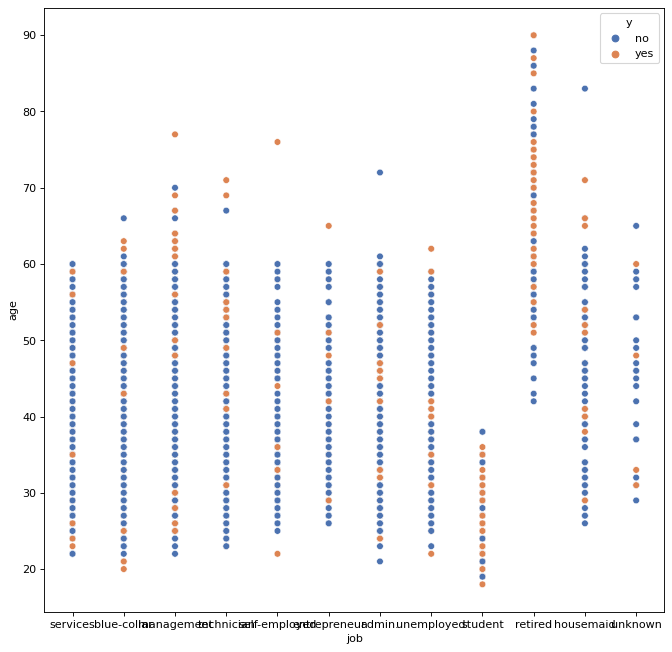

In [10]:
plt.figure(figsize=(10,10),dpi=80)
sns.scatterplot(data=cwk_data,x=cwk_data.job,y=cwk_data.age, hue='y')

## **CORRELATION**

---
We can also check if any feature is highly correlated and remove such columns.
Let us plot a heatmap of correlation between the features.

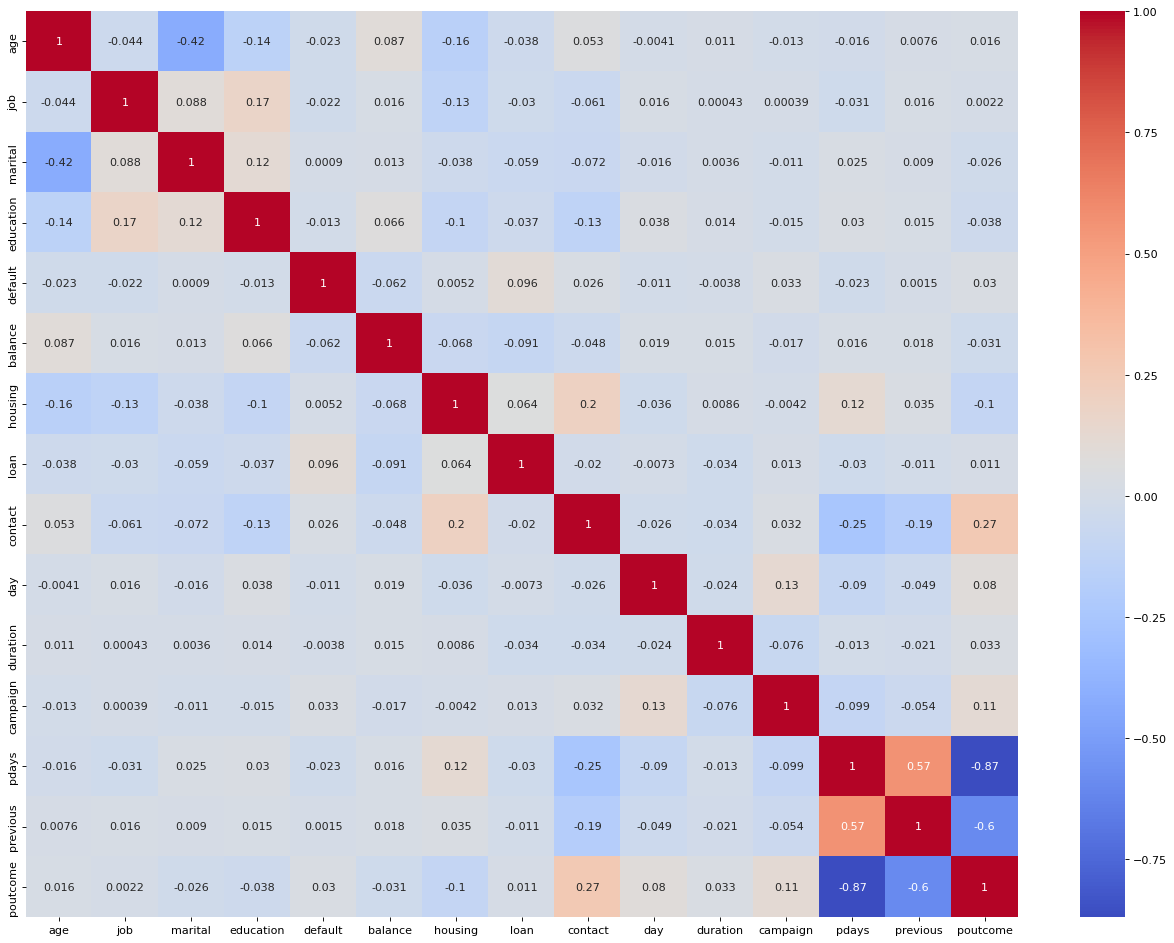

In [11]:
plt.figure(figsize=(20,15),dpi=80)

sns.heatmap(encoded_data.corr(),cmap='coolwarm',annot=True)

It can be observed that only pdays and previous are correlated. But it cannot be removed since unknown values are huge in previous and the observed correlation is only because of such cases.